In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/word2vec-nlp-tutorial/testData.tsv.zip
/kaggle/input/word2vec-nlp-tutorial/sampleSubmission.csv
/kaggle/input/word2vec-nlp-tutorial/unlabeledTrainData.tsv.zip
/kaggle/input/word2vec-nlp-tutorial/labeledTrainData.tsv.zip


In [12]:
import os
for a, b, c in os.walk('/kaggle/input'):
    print(f"{a} , {b}, {c}")

/kaggle/input , ['word2vec-nlp-tutorial'], []
/kaggle/input/word2vec-nlp-tutorial , [], ['testData.tsv.zip', 'sampleSubmission.csv', 'unlabeledTrainData.tsv.zip', 'labeledTrainData.tsv.zip']


In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        filepath = os.path.join(dirname, filename)
        filesize = str(round(os.path.getsize(filepath) / (1024*1024)) ) + "MB"
        
        print("filepath : " + filepath )
        print("filesize : " + filesize)

filepath : /kaggle/input/word2vec-nlp-tutorial/testData.tsv.zip
filesize : 13MB
filepath : /kaggle/input/word2vec-nlp-tutorial/sampleSubmission.csv
filesize : 0MB
filepath : /kaggle/input/word2vec-nlp-tutorial/unlabeledTrainData.tsv.zip
filesize : 26MB
filepath : /kaggle/input/word2vec-nlp-tutorial/labeledTrainData.tsv.zip
filesize : 13MB


In [14]:
train_data = pd.read_csv(
    '/kaggle/input/word2vec-nlp-tutorial/labeledTrainData.tsv.zip'
    , header=0, delimiter="\t"
)

In [15]:
train_data.shape

(25000, 3)

In [16]:
train_data.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [17]:
train_data.tail()

,id,sentiment,review
24995,3453_3,0,It seems like more consideration has gone into...
24996,5064_1,0,I don't believe they made this film. Completel...
24997,10905_3,0,"Guy is a loser. Can't get girls, needs to buil..."
24998,10194_3,0,This 30 minute documentary Buñuel made in the ...
24999,8478_8,1,I saw this movie as a child and it broke my he...


In [18]:
train_data.info

<bound method DataFrame.info of             id  sentiment                                             review
0       5814_8          1  With all this stuff going down at the moment w...
1       2381_9          1  \The Classic War of the Worlds\" by Timothy Hi...
2       7759_3          0  The film starts with a manager (Nicholas Bell)...
3       3630_4          0  It must be assumed that those who praised this...
4       9495_8          1  Superbly trashy and wondrously unpretentious 8...
...        ...        ...                                                ...
24995   3453_3          0  It seems like more consideration has gone into...
24996   5064_1          0  I don't believe they made this film. Completel...
24997  10905_3          0  Guy is a loser. Can't get girls, needs to buil...
24998  10194_3          0  This 30 minute documentary Buñuel made in the ...
24999   8478_8          1  I saw this movie as a child and it broke my he...

[25000 rows x 3 columns]>

In [19]:
train_data.describe()

,sentiment
count,25000.00000
mean,0.50000
std,0.50001
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [21]:
train_data['sentiment'].value_counts()

1    12500
0    12500
Name: sentiment, dtype: int64

In [22]:
train_data['sentiment'].value_counts(normalize=True)

1    0.5
0    0.5
Name: sentiment, dtype: float64

In [23]:
train_data['sentiment'].unique()

array([1, 0])

### 그래피컬한 분석을 해봅시다

In [26]:
train_length = train_data['review'].apply(len)
train_length.head()

0    2302
1     946
2    2449
3    2245
4    2231
Name: review, dtype: int64

In [27]:
train_length.describe()

count    25000.000000
mean      1327.710560
std       1005.239246
min         52.000000
25%        703.000000
50%        981.000000
75%       1617.000000
max      13708.000000
Name: review, dtype: float64

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline 

(array([1.500e+01, 6.500e+01, 3.370e+02, 5.720e+02, 5.700e+02, 5.530e+02,
        5.290e+02, 6.710e+02, 1.741e+03, 2.195e+03, 1.782e+03, 1.545e+03,
        1.210e+03, 1.155e+03, 1.016e+03, 8.440e+02, 7.590e+02, 6.420e+02,
        6.120e+02, 5.950e+02, 4.790e+02, 4.950e+02, 4.020e+02, 3.990e+02,
        3.500e+02, 3.340e+02, 3.160e+02, 3.180e+02, 2.890e+02, 2.690e+02,
        2.090e+02, 2.040e+02, 2.060e+02, 2.000e+02, 1.900e+02, 1.810e+02,
        1.520e+02, 1.420e+02, 1.360e+02, 1.170e+02, 1.230e+02, 1.180e+02,
        1.200e+02, 1.070e+02, 1.090e+02, 8.500e+01, 7.900e+01, 7.600e+01,
        8.600e+01, 7.300e+01, 8.000e+01, 6.200e+01, 5.800e+01, 4.800e+01,
        5.200e+01, 4.900e+01, 4.800e+01, 3.900e+01, 5.200e+01, 3.600e+01,
        4.600e+01, 5.100e+01, 3.400e+01, 3.400e+01, 3.400e+01, 2.100e+01,
        3.100e+01, 2.700e+01, 2.400e+01, 2.200e+01, 3.100e+01, 2.400e+01,
        1.900e+01, 1.800e+01, 2.100e+01, 2.400e+01, 1.800e+01, 1.800e+01,
        2.100e+01, 1.800e+01, 2.200e+0

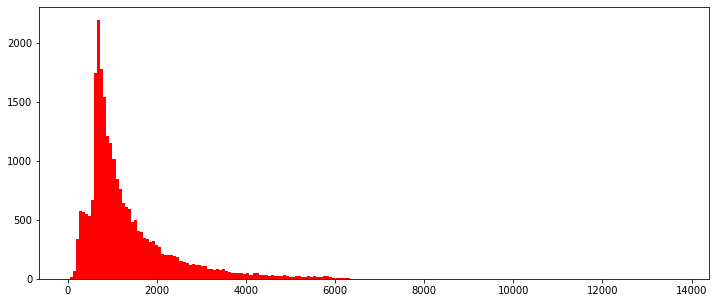

In [29]:
plt.figure(figsize=(12,5))
plt.hist(train_length, bins=200, color='red', label='legnth')

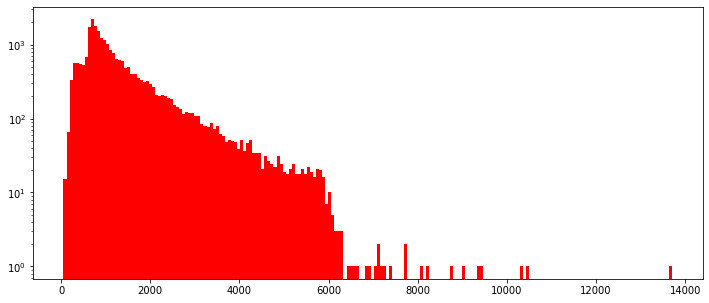

In [31]:
plt.figure(figsize=(12,5))
plt.hist(train_length, bins=200, color='red', label='legnth')
plt.yscale('log')

### box plot

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcc2dc7cdd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcc2c968dd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcc2f889cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcc2db56390>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcc2c80c190>],
 'means': [<matplotlib.lines.Line2D at 0x7fcc2db56f50>]}

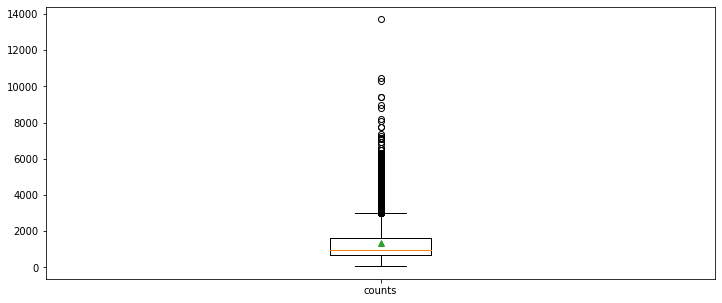

In [30]:
plt.figure(figsize=(12,5))
plt.boxplot(train_length, labels=['counts'], showmeans=True)

### wordcloud

In [33]:
!pip install --upgrade pip

In [32]:
!pip install wordcloud seaborn

(-0.5, 799.5, 599.5, -0.5)

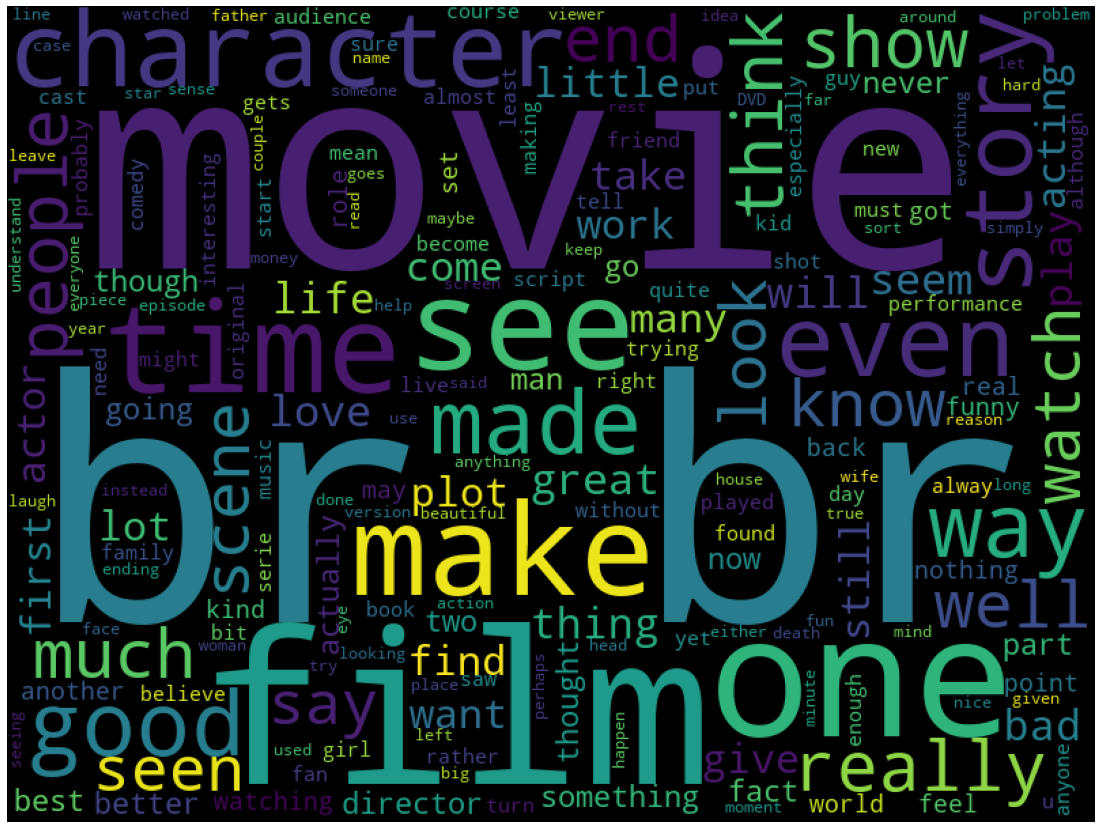

In [35]:
from wordcloud import WordCloud
cloud = WordCloud(width=800, height=600).generate(" ".join(train_data['review']))
plt.figure(figsize=(20,15))
plt.imshow(cloud)
plt.axis('off')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='sentiment', ylabel='count'>

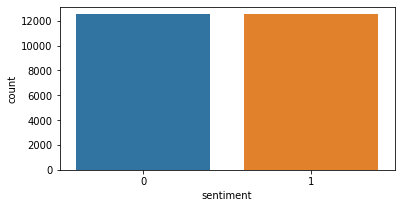

In [37]:
import seaborn as sns

fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6,3)
sns.countplot(train_data['sentiment'])

(-0.5, 799.5, 599.5, -0.5)

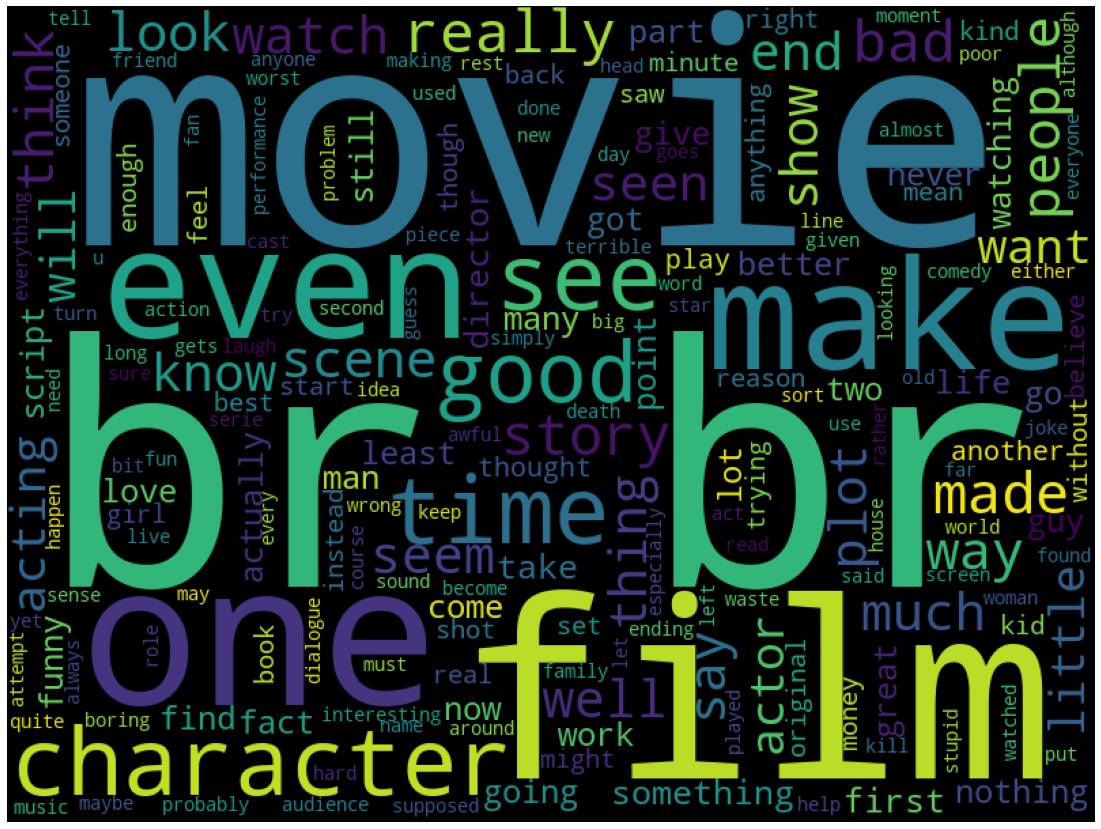

In [38]:
from wordcloud import WordCloud
cloud = WordCloud(width=800, height=600).generate(" ".join(train_data['review'].loc[train_data['sentiment']==0]))
plt.figure(figsize=(20,15))
plt.imshow(cloud)
plt.axis('off')

(-0.5, 799.5, 599.5, -0.5)

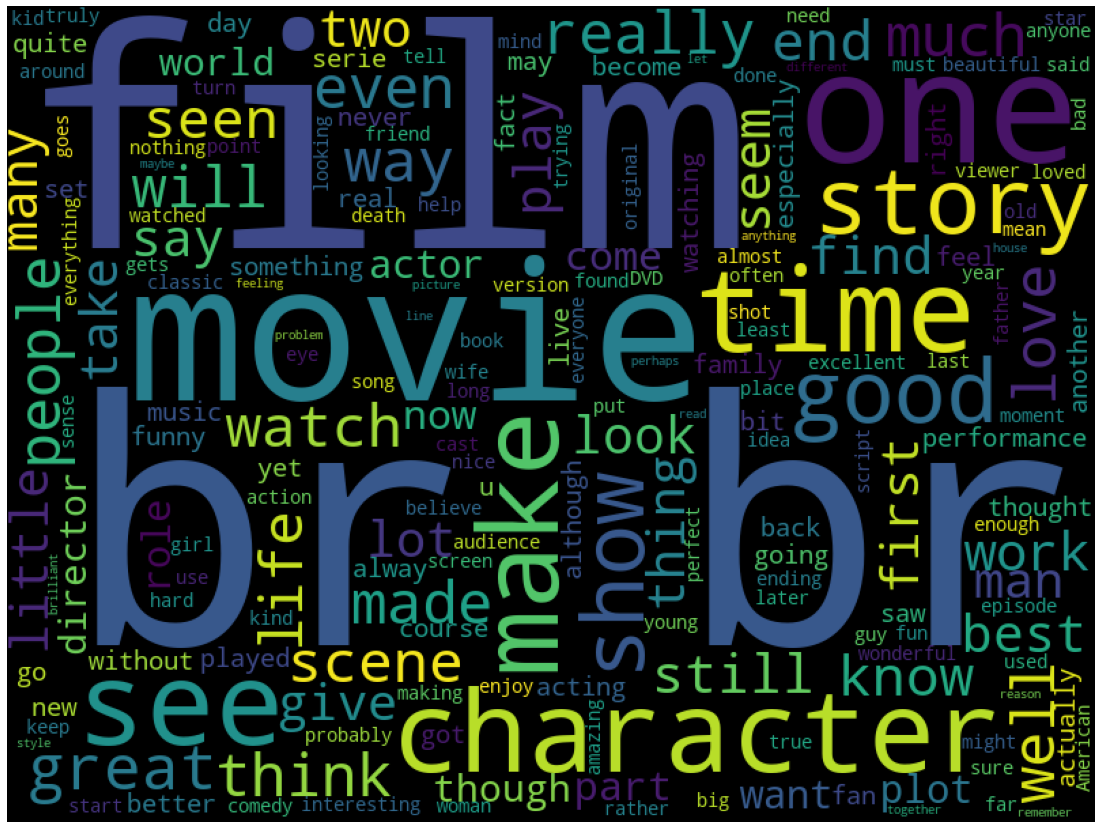

In [39]:
from wordcloud import WordCloud
cloud = WordCloud(width=800, height=600).generate(" ".join(train_data['review'].loc[train_data['sentiment']==1]))
plt.figure(figsize=(20,15))
plt.imshow(cloud)
plt.axis('off')